In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [421]:
df = pd.read_csv('data/all_jobs.csv')

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 27 columns):
area_of_work                       1175 non-null object
campaign_end_date                  1175 non-null object
campaign_start_date                1175 non-null object
contract_type                      1175 non-null object
country                            1175 non-null object
country_code                       1175 non-null object
description                        1175 non-null object
employer_logo                      236 non-null object
employer_name                      1175 non-null object
job_end_date                       7 non-null object
job_level                          1175 non-null object
job_start_date                     33 non-null object
job_type                           1175 non-null object
listing_type                       1175 non-null object
location                           1175 non-null object
number_of_positions                1175 non-null int64
requ

In [423]:
df['orig_idx'] = df.index.values

In [424]:
# Drop columns with zero variance
for col in df.columns:
    if df[col].unique().size==1:
        print("Dropping column: {0}".format(col))
        df = df.drop(col, axis=1)

Dropping column: salary_max_currency
Dropping column: salary_min_currency


In [425]:
len(df[~df['job_end_date'].isnull()])

7

In [426]:
# Drop columns with less than 40% of non-null
for col in df.columns:
    if len(df[~df[col].isnull()])/float(len(df))<0.4:
        print("Dropping column: {0}".format(col))
        df = df.drop(col, axis=1)

Dropping column: employer_logo
Dropping column: job_end_date
Dropping column: job_start_date
Dropping column: salary_info


In [427]:
# Change datetime columns to pandas datatime objects
for col in [c for c in df.columns if "_date" in c]:
    if "_date" in col:
        df[col] = pd.to_datetime(df[col])

In [428]:
# Create additional datatime features
for col in [c for c in df.columns if "_date" in c]:
    stem = col[:-5]
    df[col+'_year'] = df[col].dt.year
    df[col+'_month'] = df[col].dt.month
    df[col+'_day'] = df[col].dt.day
df['campaign_duration'] = (df['campaign_end_date'] - df['campaign_start_date']).dt.days

In [429]:
for desc in df.description.head().values:
    print desc
    print '\n'

Our client is one of the leading ethical Clothing Factories in the world producing womenwear for export. They strive to reach the highest quality export standard and have manufactured for very well established and celebrated designer. Garments produced by the Company have been worn by Michelle Obama and their work is regularly featured in international publications. They are currently seeking to recruit a Production Manager. The ideal candidate Must have prior experience in a high-end Garment Manufacturing Company.


The Norwegian Refugee Council (NRC) is a non-governmental, humanitarian organization with 60 years of experience in helping to create a safer and more dignified life for refugees and internally displaced people. NRC advocates for the rights of displaced populations and offers assistance within the shelter, education, emergency food security, legal assistance, and water,sanitation and hygiene sectors. The Norwegian Refugee Council has approximately 5000 committed and compet

In [430]:
df['desc_length'] = df['description'].apply(lambda x: len(x))

In [431]:
df.select_dtypes(include=[type(4)]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 13 columns):
number_of_positions                1175 non-null int64
required_work_experience_months    1175 non-null int64
salary_max_cents                   1175 non-null int64
salary_min_cents                   1175 non-null int64
orig_idx                           1175 non-null int64
campaign_end_date_year             1175 non-null int64
campaign_end_date_month            1175 non-null int64
campaign_end_date_day              1175 non-null int64
campaign_start_date_year           1175 non-null int64
campaign_start_date_month          1175 non-null int64
campaign_start_date_day            1175 non-null int64
campaign_duration                  1175 non-null int64
desc_length                        1175 non-null int64
dtypes: int64(13)
memory usage: 119.4 KB


In [432]:
df = pd.get_dummies(df,prefix=['country_code','job_level','listing_type','contract_type','job_type'],columns=['country_code','job_level','listing_type','contract_type','job_type'],dummy_na=True)

In [433]:
df.drop(['campaign_end_date','campaign_end_date_year','campaign_end_date_month','campaign_end_date_day'], axis=1,inplace=True)

In [434]:
top_locations = df.location.value_counts()[:15].index
for loc in top_locations:
    df['location_'+loc] = np.where(df.location==loc,1,0)
df['location_other'] = np.where(~df.location.isin(top_locations),1,0)

In [435]:
top_employers = df.employer_name.value_counts()[df.employer_name.value_counts() > 10].index

In [436]:
for emp in top_employers:
    df['employer_'+emp] = np.where(df.employer_name == emp ,1,0)
df['employer_other'] = np.where(~df.employer_name.isin(top_employers),1,0)

In [437]:
areas = [item for sublist in list(df['area_of_work'].value_counts().index) for item in sublist.split(',')]
for area in areas:
    df['aow_'+area.lower()] = np.where(df['area_of_work'].apply(lambda x: x.lower()).str.contains(area.lower()),1,0)
len(areas)

64

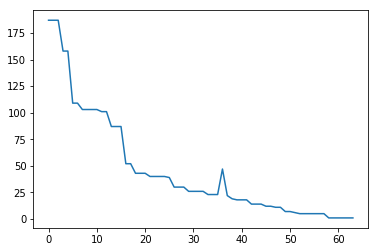

In [438]:
plt.plot(df.iloc[:,-64:].sum(axis=0).values)

In [439]:
num_to_keep = (df.iloc[:,-64:].sum(axis=0) >50).sum()
print num_to_keep
df = df.iloc[:,:-64+num_to_keep]
df.columns

18


Index([u'area_of_work', u'campaign_start_date', u'country', u'description',
       u'employer_name', u'location', u'number_of_positions',
       u'required_work_experience_months', u'responsibilities',
       u'responsibilities_raw',
       ...
       u'aow_ finance', u'aow_ banking', u'aow_ insurance', u'aow_medical',
       u'aow_ health', u'aow_information technology',
       u'aow_ software development', u'aow_ data', u'aow_administrative',
       u'aow_ clerical'],
      dtype='object', length=105)

In [440]:
df.drop(['employer_name','location','number_of_positions','salary_max_cents','salary_min_cents',
         'responsibilities_raw','styled_flow_url','url','area_of_work','responsibilities',
        'country'], axis=1, inplace=True)

In [441]:
for c in df.columns:
    print c

campaign_start_date
description
required_work_experience_months
title
orig_idx
campaign_start_date_year
campaign_start_date_month
campaign_start_date_day
campaign_duration
desc_length
country_code_CI
country_code_DZ
country_code_EG
country_code_KE
country_code_MU
country_code_MZ
country_code_NG
country_code_PK
country_code_SO
country_code_TZ
country_code_UG
country_code_ZA
country_code_nan
job_level_Entry-Level
job_level_Mid-Level
job_level_Senior
job_level_nan
listing_type_external
listing_type_internal
listing_type_nan
contract_type_Permanent
contract_type_Temporary
contract_type_nan
job_type_Full Time
job_type_Part Time
job_type_nan
location_Nairobi
location_Uganda
location_Mombasa
location_Kisumu
location_Nandi
location_Bungoma
location_Mandera
location_Meru
location_Thika
location_Taita taveta
location_Eldoret
location_Siaya
location_Nakuru
location_Nyeri
location_Kiambu
location_other
employer_Technical University Of Mombasa
employer_Health Service Commission (Uganda)
employer_Su

In [442]:
df.to_csv('data/all_with_features.csv',header=True, index=False)